In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd data/

/home/mrk/diod_shottky/data


In [3]:
ls # напряжения, при которых снималась ВАХ и которые нужно перевести в температуру 

3.38-3.27.txt  3.68-3.9.txt  3.69-3.89.txt  4.32-4.28.txt  4.89-4.96.txt


# Определение температур, при которых измерялись ВАХ, с погрешностями
Для того, чтобы определить температуру, при которой проходило измерение, зависимость напряжения от температуры на каждом участке клалась прямой (по формуле для прямой через две точки).

In [4]:
def lin_func(x, x1, x2, y1, y2):
    return (y2 - y1) * (x - x1) / (x2 - x1) + y1

In [5]:
# 3.38-3.27 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 3.38
x_final = 3.27

# интервал с таблицы
x1 = 3.020  # мВ
x2 = 3.653  # мВ
y1 = 210  # К
y2 = 230  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T1 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T1_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T1:.4} +- {T1_err:.2} К")

T = 219.6 +- 1.8 К


In [6]:
# 3.68-3.9 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 3.68
x_final = 3.9

# интервал с таблицы
x1 = 3.653  # мВ
x2 = 3.980  # мВ
y1 = 230  # К
y2 = 240  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T2 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T2_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T2:.4} +- {T2_err:.2} К")

T = 234.2 +- 3.4 К


In [7]:
# 3.69-3.89 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 3.69
x_final = 3.89

# интервал с таблицы
x1 = 3.653  # мВ
x2 = 3.980  # мВ
y1 = 230  # К
y2 = 240  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T3 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T3_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T3:.4} +- {T3_err:.2} К")

T = 234.2 +- 3.1 К


In [8]:
# 4.32-4.28 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 4.32
x_final = 4.28

# интервал с таблицы
x1 = 3.980  # мВ
x2 = 4.330  # мВ
y1 = 240  # К
y2 = 250  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T4 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T4_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T4:.4} +- {T4_err:.2} К")

T = 249.1 +- 0.64 К


In [9]:
# 4.89-4.96 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 4.89
x_final = 4.96

# интервал с таблицы
x1 = 4.660  # мВ
x2 = 5.010  # мВ
y1 = 260  # К
y2 = 270  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T5 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T5_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T5:.4} +- {T5_err:.2} К")

T = 267.6 +- 1.0 К


# Cемейство ВАХ диода Шоттки при различных температурах

In [10]:
S = 0.5 * (1e-3)**2  # м**2

vi1 = np.genfromtxt("3.38-3.27.txt")
vi1[:, 1] /= 10 * S

vi2 = np.genfromtxt("3.68-3.9.txt")
vi2[:, 1] /= 10 * S

vi3 = np.genfromtxt("3.69-3.89.txt")
vi3[:, 1] /= 10 * S

vi4 = np.genfromtxt("4.32-4.28.txt")
vi4[:, 1] /= 10 * S

vi5 = np.genfromtxt("4.89-4.96.txt")
vi5[:, 1] /= 10 * S

T1 * k / e = 0.019
T2 * k / e = 0.02
T3 * k / e = 0.02
T4 * k / e = 0.021
T5 * k / e = 0.023


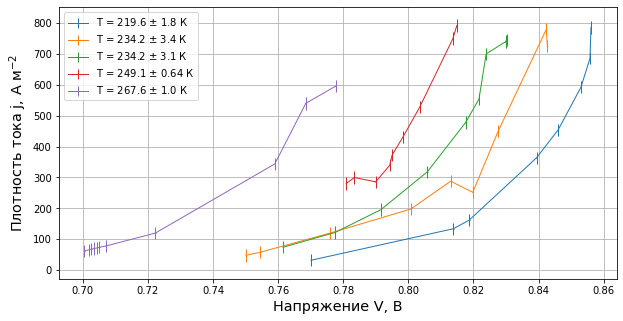

In [120]:
v_izm_err = 1e-4  # В
j_izm_err = 1e-5 / S  # А м-2

from scipy.constants import k, e

plt.errorbar(vi1[:, 0], vi1[:, 1], xerr=v_izm_err, yerr=j_izm_err,
             label=fr"T = {T1:.4} $\pm$ {T1_err:.2} К", lw=1, c='C0')
plt.errorbar(vi2[:, 0], vi2[:, 1], xerr=v_izm_err, yerr=j_izm_err,
             label=fr"T = {T2:.4} $\pm$ {T2_err:.2} К", lw=1, c='C1')
plt.errorbar(vi3[:, 0], vi3[:, 1], xerr=v_izm_err, yerr=j_izm_err,
             label=fr"T = {T3:.4} $\pm$ {T3_err:.2} К", lw=1, c='C2')
plt.errorbar(vi4[:-1, 0], vi4[:-1, 1], xerr=v_izm_err, yerr=j_izm_err,
             label=fr"T = {T4:.4} $\pm$ {T4_err:.2} К", lw=1, c='C3')
plt.errorbar(vi5[:-1, 0], vi5[:-1, 1], xerr=v_izm_err, yerr=j_izm_err,
             label=fr"T = {T5:.4} $\pm$ {T5_err:.2} К", lw=1, c='C4')

# plt.axvline(x=T1 * k / e, c='C0', ls='--')
# plt.axvline(x=T2 * k / e, c='C1', ls='--')
# plt.axvline(x=T3 * k / e, c='C2', ls='--')
# plt.axvline(x=T4 * k / e, c='C3', ls='--')
# plt.axvline(x=T5 * k / e, c='C4', ls='--')

# plt.yscale('log')

plt.xlabel('Напряжение V, В', fontsize='x-large')
plt.ylabel(r'Плотность тока j, А м${}^{-2}$', fontsize='x-large')

plt.grid()
plt.legend(loc=2)

print(f'T1 * k / e = {T1 * k / e:.2}')
print(f'T2 * k / e = {T2 * k / e:.2}')
print(f'T3 * k / e = {T3 * k / e:.2}')
print(f'T4 * k / e = {T4 * k / e:.2}')
print(f'T5 * k / e = {T5 * k / e:.2}')

plt.rcParams["figure.figsize"] = (10,5)

Видно, что все измерения снимались при условии $V > kT/e$

In [109]:
def func(V, j, T):
    return np.log(j / (1-np.exp(-e * V / (k * T))))

def Delta_func(V, j, T, V_err, j_err, T_err):
    return j_err/j + e/k*(V_err*T+T_err*V)/T**2/(-1+np.exp(e*V/(k*T)))

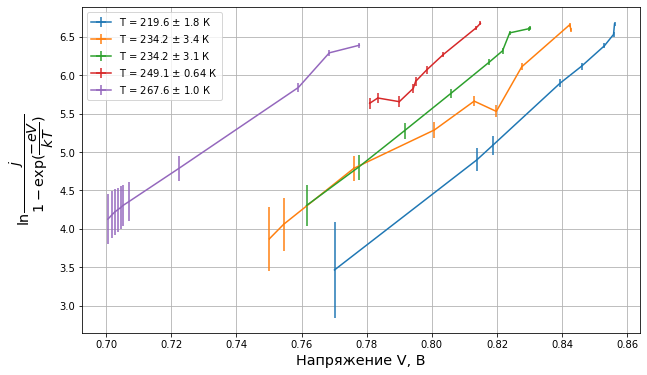

In [119]:
plt.errorbar(vi1[:, 0], func(vi1[:, 0], vi1[:, 1], T1), 
             xerr=v_izm_err, yerr=Delta_func(vi1[:, 0], 
                                             vi1[:, 1],
                                             T1,
                                             v_izm_err,
                                             j_izm_err,
                                             T1_err),
             label=fr"T = {T1:.4} $\pm$ {T1_err:.2} К",
             c='C0')

plt.errorbar(vi2[:, 0], func(vi2[:, 0], vi2[:, 1], T2), 
             xerr=v_izm_err, yerr=Delta_func(vi2[:, 0], 
                                             vi2[:, 1],
                                             T2,
                                             v_izm_err,
                                             j_izm_err,
                                             T2_err),
             label=fr"T = {T2:.4} $\pm$ {T2_err:.2} К",
             c='C1')

plt.errorbar(vi3[:, 0], func(vi3[:, 0], vi3[:, 1], T3), 
             xerr=v_izm_err, yerr=Delta_func(vi3[:, 0], 
                                             vi3[:, 1],
                                             T3,
                                             v_izm_err,
                                             j_izm_err,
                                             T3_err),
             label=fr"T = {T3:.4} $\pm$ {T3_err:.2} К",
             c='C2')

plt.errorbar(vi4[:-1, 0], func(vi4[:-1, 0], vi4[:-1, 1], T4), 
             xerr=v_izm_err, yerr=Delta_func(vi4[:-1, 0], 
                                             vi4[:-1, 1],
                                             T4,
                                             v_izm_err,
                                             j_izm_err,
                                             T4_err),
             label=fr"T = {T4:.4} $\pm$ {T4_err:.2} К",
             c='C3')

plt.errorbar(vi5[:-1, 0], func(vi5[:-1, 0], vi5[:-1, 1], T5), 
             xerr=v_izm_err, yerr=Delta_func(vi5[:-1, 0], 
                                             vi5[:-1, 1],
                                             T5,
                                             v_izm_err,
                                             j_izm_err,
                                             T5_err),
             label=fr"T = {T5:.4} $\pm$ {T5_err:.2} К",
             c='C4')

plt.xlabel('Напряжение V, В', fontsize='x-large')
plt.ylabel(r'$\mathsf{ln}\dfrac{j}{1-\mathsf{exp}(\dfrac{-eV}{kT})}$', fontsize='x-large')

plt.grid()
plt.legend(loc=2)

plt.rcParams["figure.figsize"] = (10,5)

A* = 9.02 +- 18.1
phi_0 = 0.69


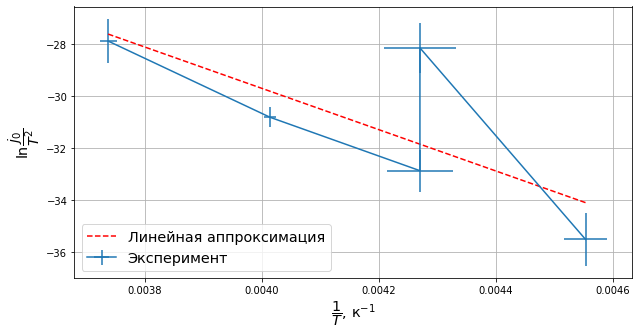

In [163]:
_, b1 = np.polyfit(vi1[:, 0], func(vi1[:, 0], vi1[:, 1], T1), 1)
_, b2 = np.polyfit(vi2[:, 0], func(vi2[:, 0], vi2[:, 1], T2), 1)
_, b3 = np.polyfit(vi3[:, 0], func(vi3[:, 0], vi3[:, 1], T3), 1)
_, b4 = np.polyfit(vi4[:-1, 0], func(vi4[:-1, 0], vi4[:-1, 1], T4), 1)
_, b5 = np.polyfit(vi5[:-1, 0], func(vi5[:-1, 0], vi5[:-1, 1], T5), 1)

b1_err = (func(vi1[:, 0], vi1[:, 1], T1)).std()
b2_err = (func(vi2[:, 0], vi2[:, 1], T2)).std()
b3_err = (func(vi3[:, 0], vi3[:, 1], T3)).std()
b4_err = (func(vi4[:-1, 0], vi4[:-1, 1], T4)).std()
b5_err = (func(vi5[:-1, 0], vi5[:-1, 1], T5)).std()

b = np.array([b1, b2, b3, b4, b5])
b_err = np.array([b1_err, b2_err, b3_err, b4_err, b5_err])

j_0 = np.exp(b)
j_0_err = b_err * j_0

T = np.array([T1, T2, T3, T4, T5])
T_err = np.array([T1_err, T2_err, T3_err, T4_err, T5_err])

plt.errorbar(1/T, np.log(j_0/T**2), xerr=T_err/T**2, yerr=T_err/T+j_0_err/j_0, label='Эксперимент')

A, B = np.polyfit(1/T, np.log(j_0/T**2), 1)

plt.plot(1/T, A/T+B, 'r--', label='Линейная аппроксимация')

plt.xlabel(r'$\dfrac{1}{T}$, к${}^{-1}$', fontsize='x-large')
plt.ylabel(r'$\mathsf{ln}\dfrac{j_0}{T^2}$', fontsize='x-large')

plt.grid()
plt.legend(loc=3, fontsize='x-large')

plt.rcParams["figure.figsize"] = (10,5)

print(fr'A* = {np.exp(B):.3} +- {np.exp(np.std(np.log(j_0/T**2))):.3}')
print(fr'phi_0 = {-A*k/e:.2}')